In [1]:
import pandas as pd
import seaborn as sns

In [7]:
df_foursquare = pd.read_csv("/Users/ojefua/Documents/Projects/lhl-statistical-modelling-project/data/foursquare_features.csv")
df_yelp = pd.read_csv("/Users/ojefua/Documents/Projects/lhl-statistical-modelling-project/data/yelp_features.csv")
df2 = pd.read_csv("/Users/ojefua/Documents/Projects/lhl-statistical-modelling-project/data/dublin_city_bikes.csv")


In [8]:

df_poi = pd.merge(df_foursquare, df_yelp, on=['Latitude','Longitude'])
df_all = pd.merge(df_poi, df2, on=['Latitude','Longitude'])
df_all

,Latitude,Longitude,Average_dist_F,Average_popularity_F,Average_rating_F,Average_distance_Y,Average_review_count_Y,Average_rating_Y,Station Name,Number of Bikes
0,53.350230,-6.279696,606.1,0.967403,9.09,813.634974,21.05,4.725,GEORGES LANE,17
1,53.357841,-6.251557,824.0,0.963300,8.91,852.302705,28.95,4.675,NORTH CIRCULAR ROAD (O'CONNELL'S),28
2,53.356307,-6.273717,999.3,0.969428,9.01,839.916357,19.25,4.725,PHIBSBOROUGH ROAD,2
3,53.349562,-6.278198,584.4,0.972062,9.13,777.232101,16.45,4.750,SMITHFIELD NORTH,23
4,53.336021,-6.262980,709.7,0.990946,9.20,689.425498,29.90,4.775,CLONMEL STREET,3
...,...,...,...,...,...,...,...,...,...,...
109,53.336597,-6.248109,782.5,0.976231,9.13,690.606529,18.15,4.675,JAMES STREET EAST,0
110,53.353742,-6.265301,646.9,0.967628,9.10,625.914671,17.00,4.800,PARNELL SQUARE NORTH,1
111,53.344603,-6.263371,433.1,0.990964,9.22,676.468985,15.85,4.875,FOWNES STREET UPPER,18
112,53.347692,-6.278214,566.9,0.971522,9.14,768.840359,15.25,4.775,SMITHFIELD,14


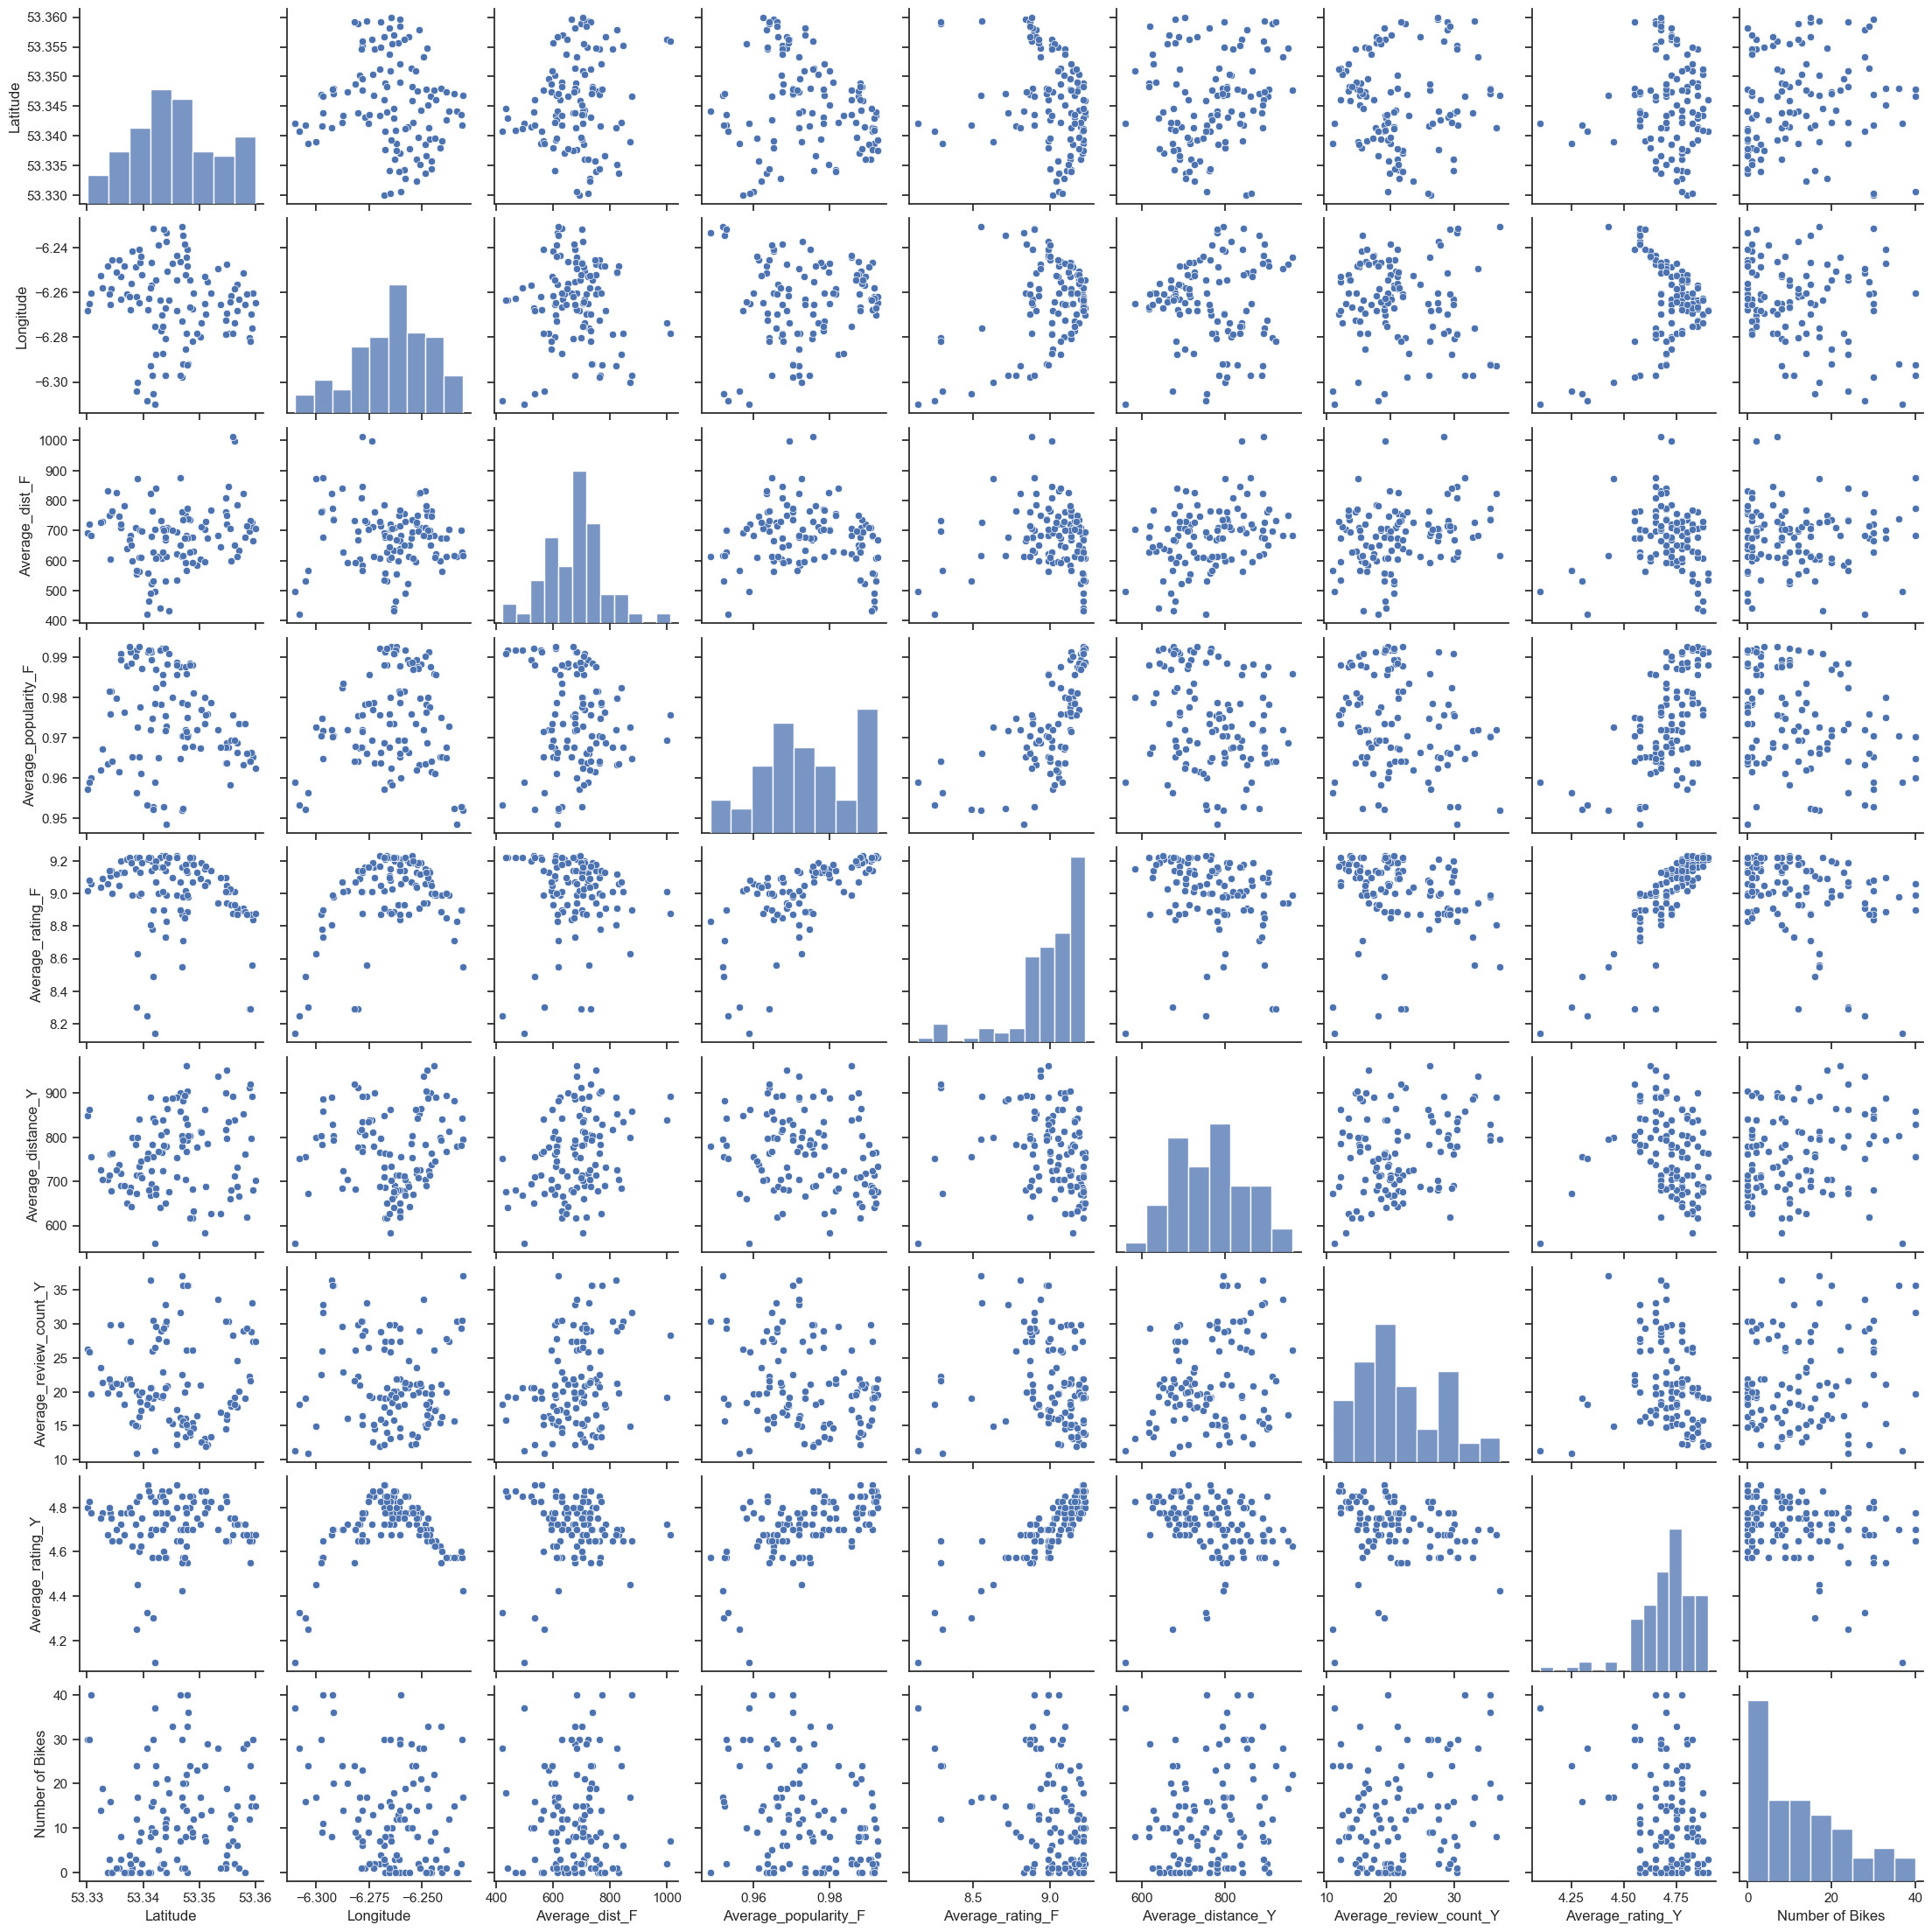

In [41]:
sns.set(style="ticks", color_codes=True)
# iris = sns.load_dataset("iris")
g = sns.pairplot(df_all)

import matplotlib.pyplot as plt
plt.show()

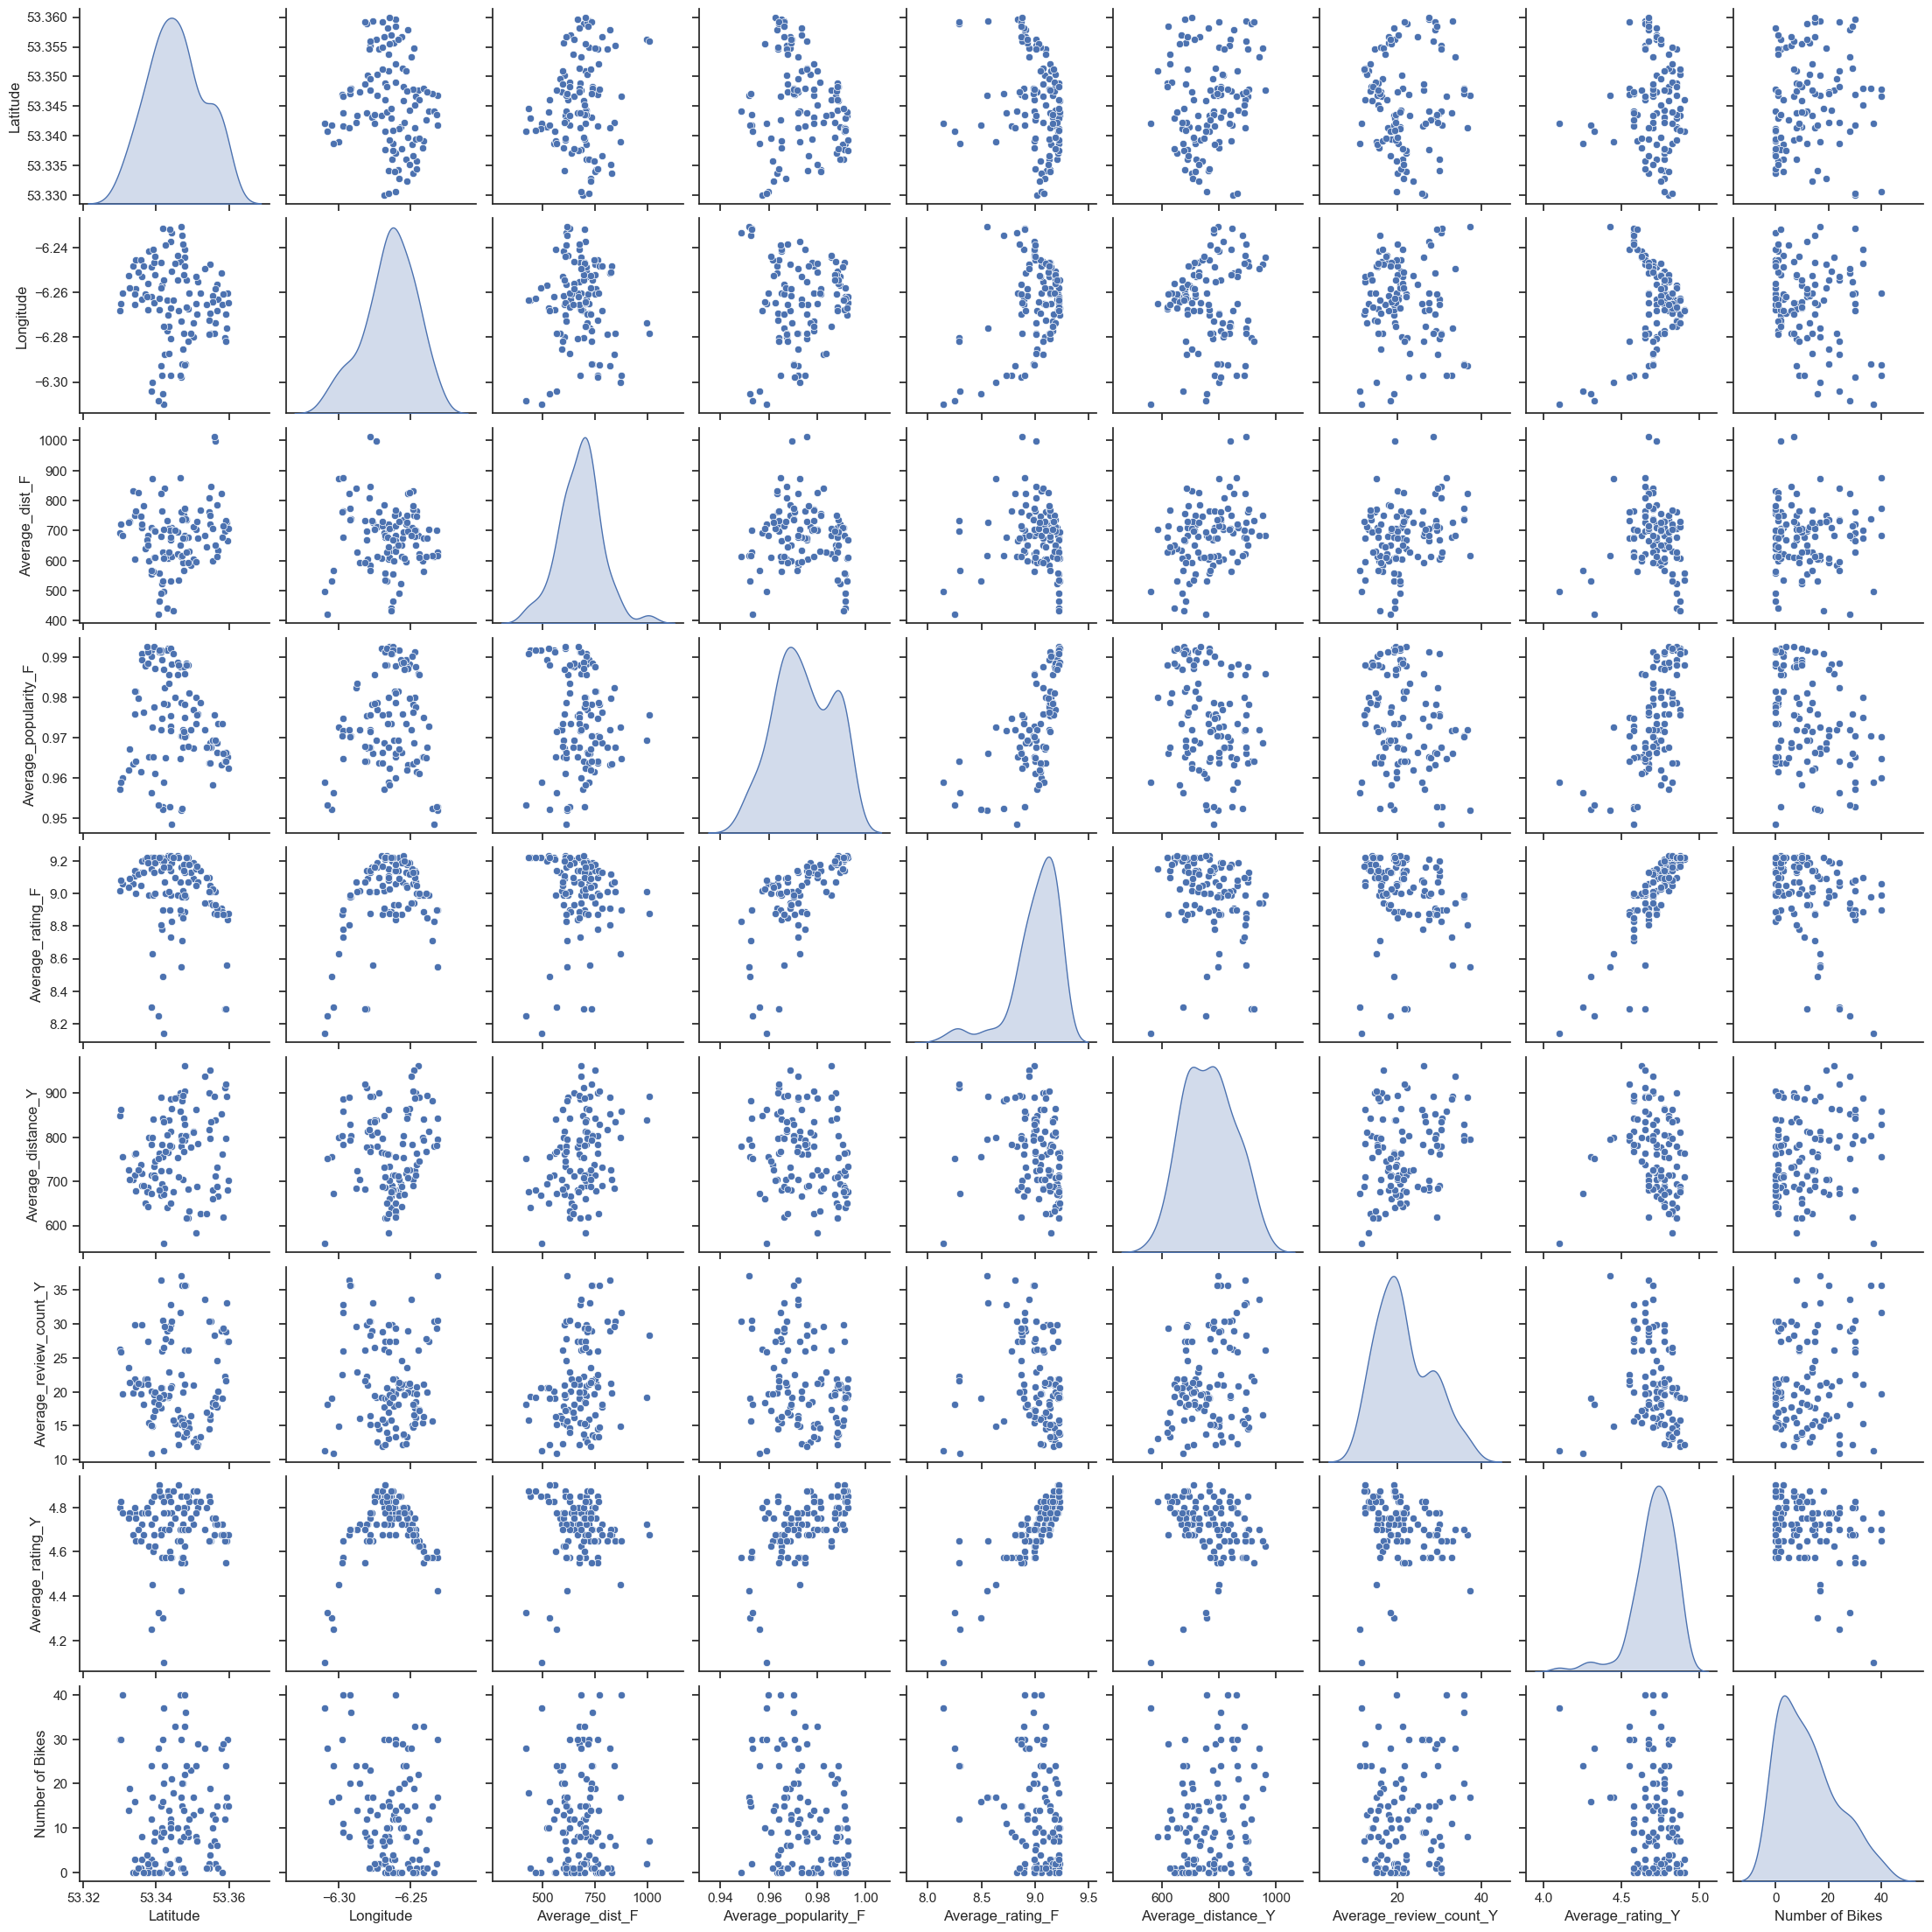

In [43]:
g = sns.pairplot(df_all, diag_kind="kde")
plt.show()

In [47]:
correlation_matrix = df_all.corr(numeric_only=True)
correlation_matrix

,Latitude,Longitude,Average_dist_F,Average_popularity_F,Average_rating_F,Average_distance_Y,Average_review_count_Y,Average_rating_Y,Number of Bikes
Latitude,1.000000,-0.120228,0.153339,-0.184480,-0.258537,0.177286,0.023336,0.004866,0.123846
Longitude,-0.120228,1.000000,-0.055320,0.072348,0.359458,0.072578,-0.110066,0.213240,-0.274324
Average_dist_F,0.153339,-0.055320,1.000000,-0.130532,0.003925,0.342933,0.284393,0.002294,0.006529
Average_popularity_F,-0.184480,0.072348,-0.130532,1.000000,0.667597,-0.241336,-0.249042,0.602765,-0.318185
Average_rating_F,-0.258537,0.359458,0.003925,0.667597,1.000000,-0.236298,-0.174067,0.848595,-0.369140
Average_distance_Y,0.177286,0.072578,0.342933,-0.241336,-0.236298,1.000000,0.264016,-0.158278,0.182453
Average_review_count_Y,0.023336,-0.110066,0.284393,-0.249042,-0.174067,0.264016,1.000000,-0.166122,0.193253
Average_rating_Y,0.004866,0.213240,0.002294,0.602765,0.848595,-0.158278,-0.166122,1.000000,-0.300657
Number of Bikes,0.123846,-0.274324,0.006529,-0.318185,-0.369140,0.182453,0.193253,-0.300657,1.000000


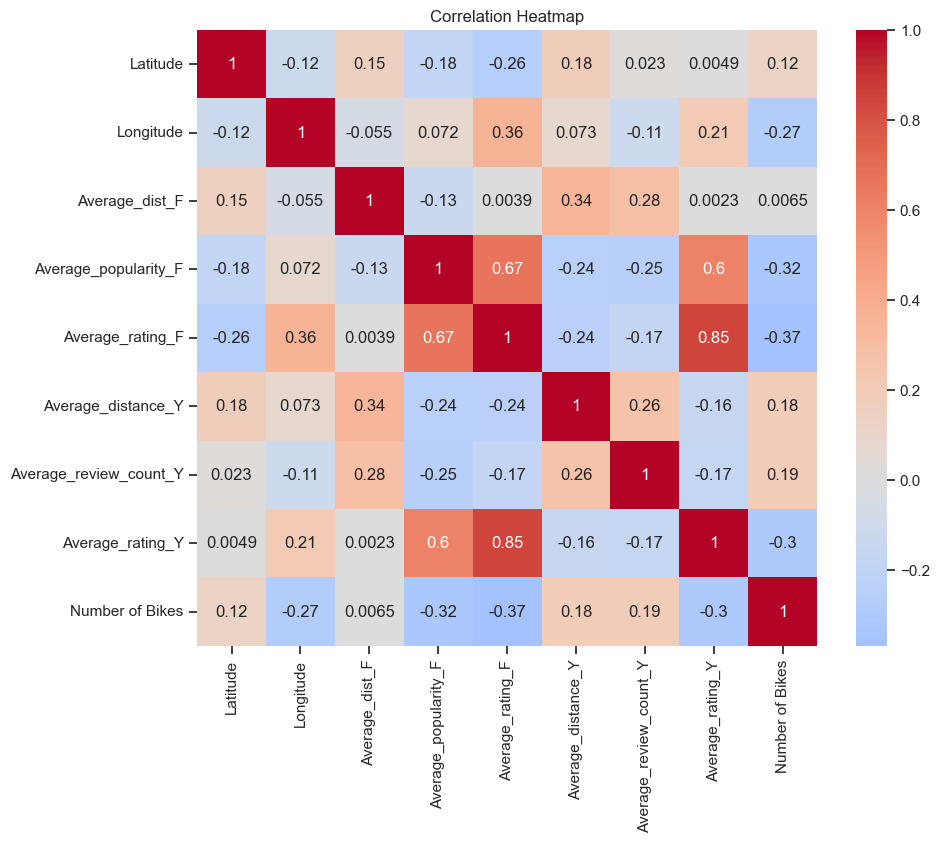

In [48]:
plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

plt.title("Correlation Heatmap")
plt.show()

In [20]:
import scipy

stat, p1 = scipy.stats.pearsonr(df_all['Number of Bikes'], df_all['Average_popularity_F'])
stat, p2 = scipy.stats.pearsonr(df_all['Number of Bikes'], df_all['Average_rating_F'])
stat, p3 = scipy.stats.pearsonr(df_all['Number of Bikes'], df_all['Average_rating_Y'])

stat, p4 = scipy.stats.pearsonr(df_all['Number of Bikes'], df_all['Average_review_count_Y'])
stat, p5 = scipy.stats.pearsonr(df_all['Number of Bikes'], df_all['Longitude'])
stat, p6 = scipy.stats.pearsonr(df_all['Number of Bikes'], df_all['Average_distance_Y'])

print(p1, p2, p3, p4, p5, p6, sep='\n\n')

0.0005606796349455287

5.308739246783234e-05

0.001152790554498734

0.03938911581095313

0.003141132596676071

0.052024003566604464


In [25]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

y = df_all['Number of Bikes']
X = df_all['Average_rating_F']
X = sm.add_constant(X) #adds a column of 1's so the model will contain an intercept, bias
X.head()

,const,Average_rating_F
0,1.0,9.09
1,1.0,8.91
2,1.0,9.01
3,1.0,9.13
4,1.0,9.20


In [22]:
model = sm.OLS(y, X)
results = model.fit() #fit the model (this is where OLS is actually being run)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Number of Bikes   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     17.67
Date:                Sat, 26 Aug 2023   Prob (F-statistic):           5.31e-05
Time:                        17:03:45   Log-Likelihood:                -426.64
No. Observations:                 114   AIC:                             857.3
Df Residuals:                     112   BIC:                             862.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              175.1076     38.734  

In [23]:
residuals = results.resid #same unit as target or depend var
residuals

0       6.183068
1      13.929787
2     -10.262834
3      12.906020
4      -5.828815
         ...    
109   -10.093980
110    -9.636194
111     9.532660
112     4.086758
113    -0.551767
Length: 114, dtype: float64

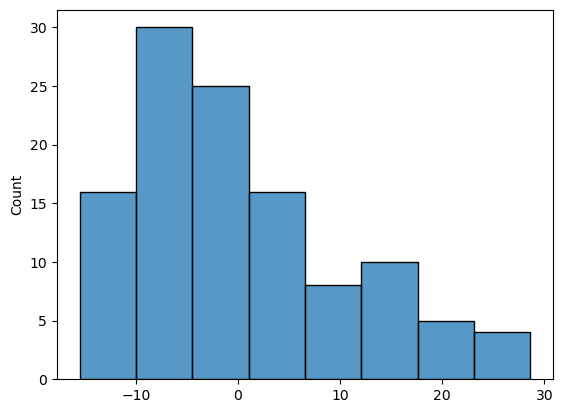

In [26]:
sns.histplot(residuals)
plt.show()

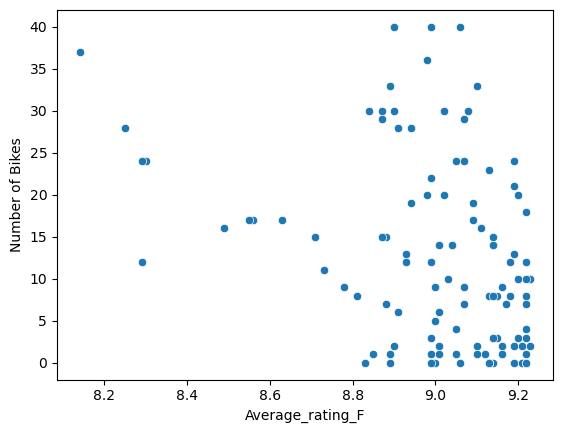

In [28]:
sns.scatterplot(data=df_all, x='Average_rating_F', y='Number of Bikes')
plt.show()

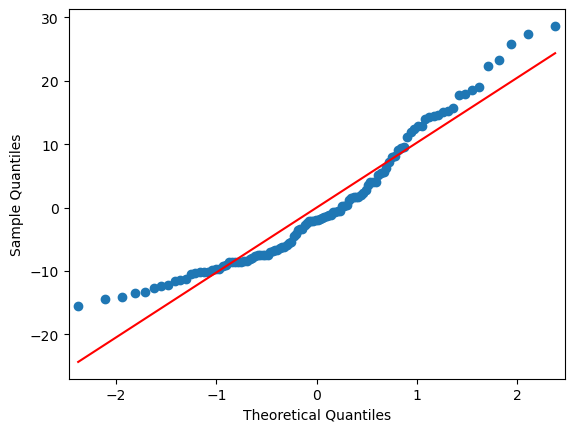

In [29]:
sm.qqplot(residuals, line="r")
plt.show()

In [30]:
scipy.stats.shapiro(residuals)

ShapiroResult(statistic=0.9291975498199463, pvalue=1.391873047396075e-05)

In [31]:
results.params

const               175.107624
Average_rating_F    -18.073783
dtype: float64

In [32]:
b = results.params['const']
m = results.params['Average_rating_F']

known_rating = 5
predicted_num_bikes = m*known_rating + b
predicted_num_bikes

84.73870608158289

In [45]:
y = df_all['Number of Bikes']
X = df_all[['Average_review_count_Y', 'Average_distance_Y',
            'Average_rating_F', 'Average_popularity_F']]
X = sm.add_constant(X)  # adds a column of 1's for the intercept
X.head()


,const,Average_review_count_Y,Average_distance_Y,Average_rating_F,Average_popularity_F
0,1.0,21.05,813.634974,9.09,0.967403
1,1.0,28.95,852.302705,8.91,0.963300
2,1.0,19.25,839.916357,9.01,0.969428
3,1.0,16.45,777.232101,9.13,0.972062
4,1.0,29.90,689.425498,9.20,0.990946


In [46]:
model = sm.OLS(y, X) #instantiate
results = model.fit() #fit the model (this is where OLS is actually being run)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Number of Bikes   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     5.305
Date:                Sat, 26 Aug 2023   Prob (F-statistic):           0.000609
Time:                        17:33:31   Log-Likelihood:                -424.85
No. Observations:                 114   AIC:                             859.7
Df Residuals:                     109   BIC:                             873.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    208

In [ ]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

y = df_all['Number of Bikes']
X = df_all(['Average_rating_Y'],['Average_review_count_Y'],['Average_distance_Y'],
                ['Average_rating_F'],['Average_popularity_F'] axis = 1)



In [15]:
# Specify the file path for the CSV
csv_file_path = "/Users/ojefua/Documents/Projects/lhl-statistical-modelling-project/data/foursquare_nested_places.csv"

# Save the DataFrame to CSV
df_foursquare.to_csv(csv_file_path, index=False)

In [49]:
import sqlite3
from sqlite3 import Error

In [50]:
def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

In [57]:
connection = create_connection("./data/bikes_poi.sqlite")

Connection to SQLite DB successful


In [ ]:
# def execute_query(connection, query):
#     cursor = connection.cursor()
#     try:
#         cursor.execute(query)
#         connection.commit()
#         print("Query executed successfully")
#     except Error as e:
#         print(f"The error '{e}' occurred")

In [ ]:
# create_bikes_table = """
# CREATE TABLE IF NOT EXISTS bikes (
#   id INTEGER PRIMARY KEY AUTOINCREMENT,
#   station_name TEXT,
#   latitude INTEGER NOT NULL,
#   longitude INTEGER NOT NULL,
#   number_of_bikes INTEGER
# );
# """

In [60]:

# Connect to the SQLite database (or create a new one)
# conn = sqlite3.connect('/data/bikes_poi.sqlite')

# Write the DataFrame to the database
df_foursquare.to_sql('foursquare', connection, if_exists='replace', index=False)
df_yelp.to_sql('yelp', connection, if_exists='replace', index=False)
df2.to_sql('bikes', connection, if_exists='replace', index=False)

# Close the database connection
connection.close()

In [61]:
def execute_read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as e:
        print(f"The error '{e}' occurred")

In [66]:
connection = create_connection("./data/bikes_poi.sqlite")

select_bikes = "SELECT * FROM bikes"
bikes = execute_read_query(connection, select_bikes)

for station in bikes:
    print(station)

connection.close()

Connection to SQLite DB successful
('GEORGES LANE', 53.35023, -6.279696, 17)
("NORTH CIRCULAR ROAD (O'CONNELL'S)", 53.357841, -6.251557, 28)
('PHIBSBOROUGH ROAD', 53.356307, -6.273717, 2)
('SMITHFIELD NORTH', 53.349562, -6.278198, 23)
('CLONMEL STREET', 53.336021, -6.26298, 3)
('AVONDALE ROAD', 53.359405, -6.276142, 17)
('MOUNT STREET LOWER', 53.33796, -6.24153, 1)
('CHRISTCHURCH PLACE', 53.343368, -6.27012, 2)
('GRANTHAM STREET', 53.334123, -6.265436, 16)
('PEARSE STREET', 53.344304, -6.250427, 21)
('YORK STREET EAST', 53.338755, -6.262003, 12)
('EXCISE WALK', 53.347777, -6.244239, 22)
('FITZWILLIAM SQUARE WEST', 53.336074, -6.252825, 8)
('PORTOBELLO ROAD', 53.330091, -6.268044, 30)
('PARNELL STREET', 53.350929, -6.265125, 8)
('FREDERICK STREET SOUTH', 53.341515, -6.256853, 10)
('CUSTOM HOUSE', 53.348279, -6.254662, 24)
('RATHDOWN ROAD', 53.35893, -6.280337, 12)
('HANOVER QUAY', 53.344115, -6.237153, 12)
('OLIVER BOND STREET', 53.343893, -6.280531, 8)
('COLLINS BARRACKS MUSEUM', 53.34

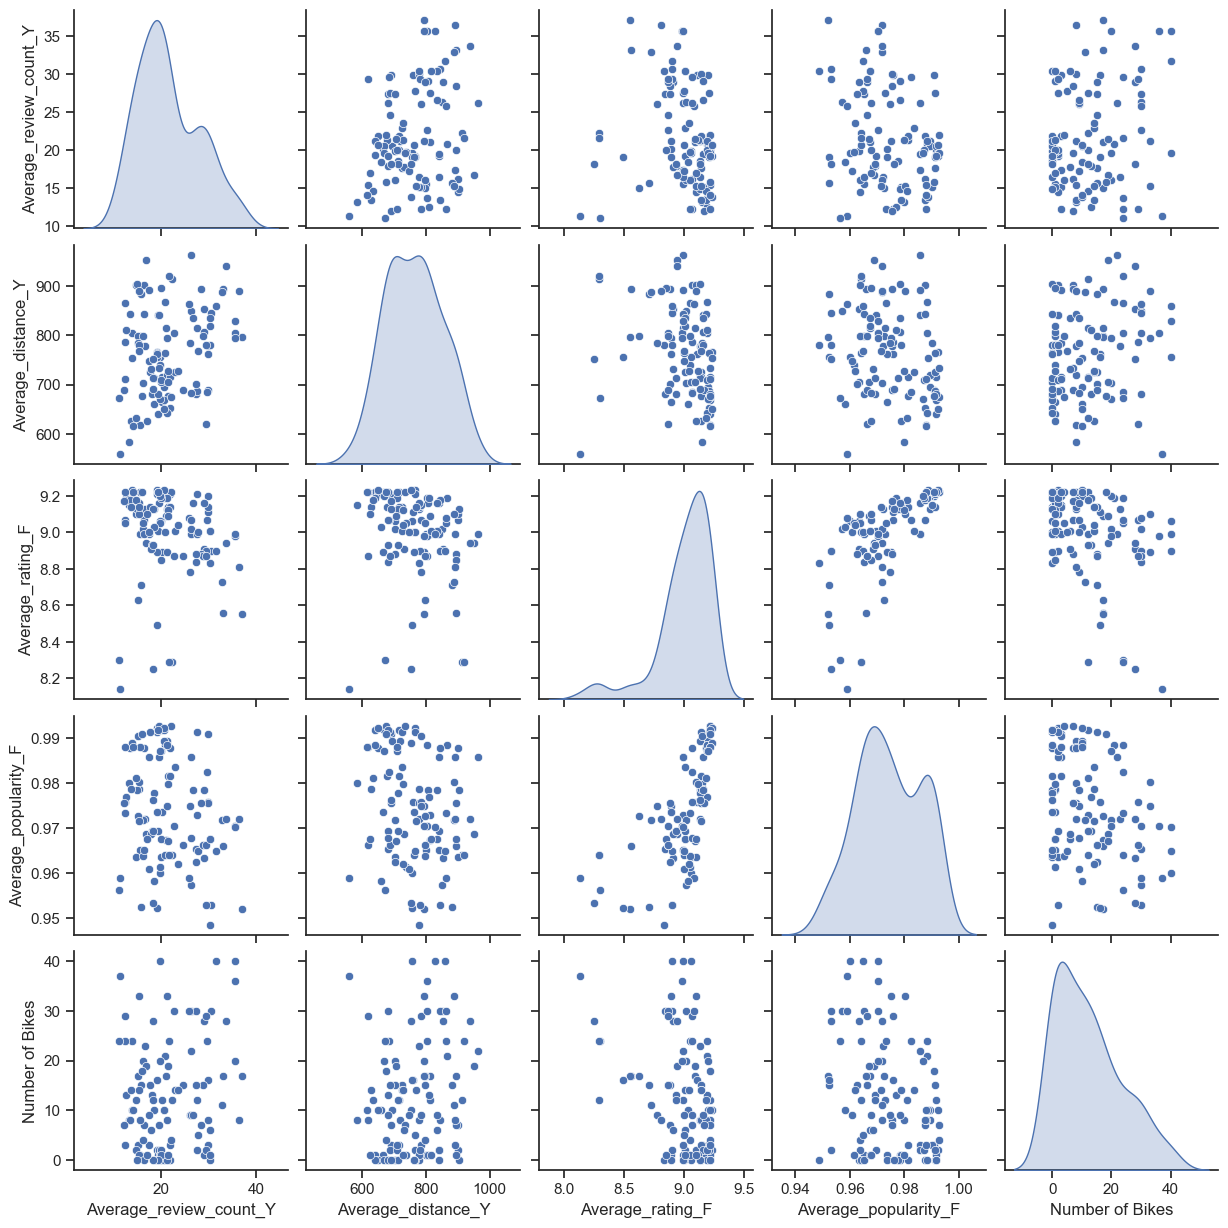

In [51]:
sns.set(style="ticks", color_codes=True)

# g = sns.pairplot(df_all)
sns.pairplot(df_all,diag_kind='kde', vars=['Average_review_count_Y', 'Average_distance_Y',
            'Average_rating_F', 'Average_popularity_F', 'Number of Bikes'])

plt.show()

In [52]:
import pandas as pd

df_foursquare = pd.read_csv("../data/foursquare_features.csv")
df_yelp = pd.read_csv("../data/yelp_features.csv")
df2 = pd.read_csv("../data/dublin_city_bikes.csv")

df_poi = pd.merge(df_foursquare, df_yelp, on=['Latitude','Longitude'])
df_all = pd.merge(df_poi, df2, on=['Latitude','Longitude'])
df_all

,Latitude,Longitude,Average_dist_F,Average_popularity_F,Average_rating_F,Max_rating_F,Max_popularity_F,Min_rating_F,Min_popularity_F,Average_distance_Y,Average_review_count_Y,Average_rating_Y,Max_rating_Y,Max_review_count,Min_rating_Y,Min_review_count,Station Name,Number of Bikes
0,53.350230,-6.279696,618.5,0.969202,9.09,9.3,0.995915,8.9,0.923782,813.634974,21.05,4.725,5.0,97,4.5,4,GEORGES LANE,10
1,53.357841,-6.251557,824.0,0.964197,8.90,9.4,0.997029,8.7,0.897986,852.302705,28.95,4.675,5.0,106,4.5,3,NORTH CIRCULAR ROAD (O'CONNELL'S),14
2,53.356307,-6.273717,999.3,0.970233,8.98,9.4,0.998886,8.7,0.923782,834.061440,17.85,4.725,5.0,56,4.5,4,PHIBSBOROUGH ROAD,17
3,53.349562,-6.278198,584.4,0.972195,9.13,9.3,0.999257,9.0,0.923782,777.232101,16.45,4.750,5.0,50,4.5,4,SMITHFIELD NORTH,16
4,53.336021,-6.262980,709.7,0.991156,9.22,9.5,0.999829,9.1,0.958349,689.425498,29.90,4.775,5.0,165,4.5,5,CLONMEL STREET,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,53.336597,-6.248109,782.5,0.977200,9.14,9.5,0.999829,9.0,0.914641,690.606529,18.15,4.675,5.0,68,4.5,5,JAMES STREET EAST,0
110,53.353742,-6.265301,646.9,0.968302,9.09,9.4,0.995915,8.9,0.923782,625.914671,17.00,4.800,5.0,50,4.5,4,PARNELL SQUARE NORTH,0
111,53.344603,-6.263371,433.1,0.990933,9.23,9.5,0.999829,9.1,0.963005,676.468985,15.85,4.875,5.0,101,4.5,4,FOWNES STREET UPPER,16
112,53.347692,-6.278214,567.5,0.973375,9.14,9.3,0.999257,9.0,0.923782,768.840359,15.25,4.775,5.0,50,4.5,4,SMITHFIELD,21


In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

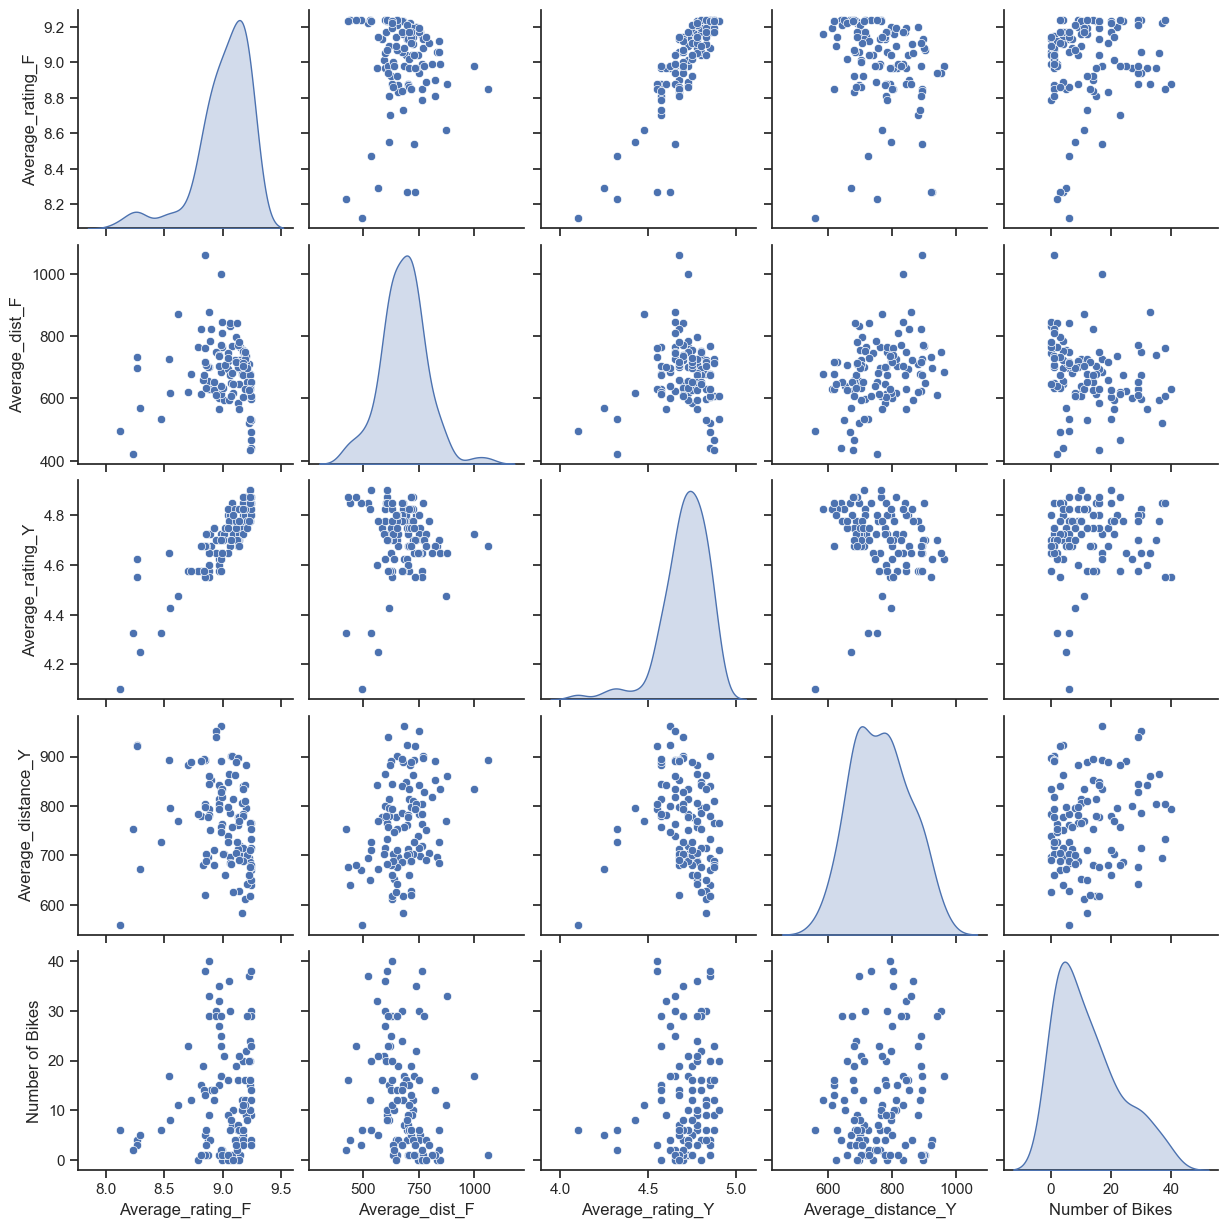

In [101]:
sns.set(style="ticks", color_codes=True)

sns.pairplot(df_all, diag_kind="kde", vars=['Average_rating_F', 'Average_dist_F',
                                            'Average_rating_Y', 'Average_distance_Y', 'Number of Bikes'])

plt.show()

In [102]:
df_features = df_all[['Average_rating_F', 'Average_dist_F',
                        'Average_rating_Y', 'Average_distance_Y', 'Number of Bikes']]
# df_features

In [103]:
correlation_matrix = df_features.corr(numeric_only=True)
correlation_matrix

,Average_rating_F,Average_dist_F,Average_rating_Y,Average_distance_Y,Number of Bikes
Average_rating_F,1.000000,-0.004513,0.855557,-0.243149,0.128112
Average_dist_F,-0.004513,1.000000,0.009763,0.329463,-0.241534
Average_rating_Y,0.855557,0.009763,1.000000,-0.147352,0.075879
Average_distance_Y,-0.243149,0.329463,-0.147352,1.000000,0.146536
Number of Bikes,0.128112,-0.241534,0.075879,0.146536,1.000000


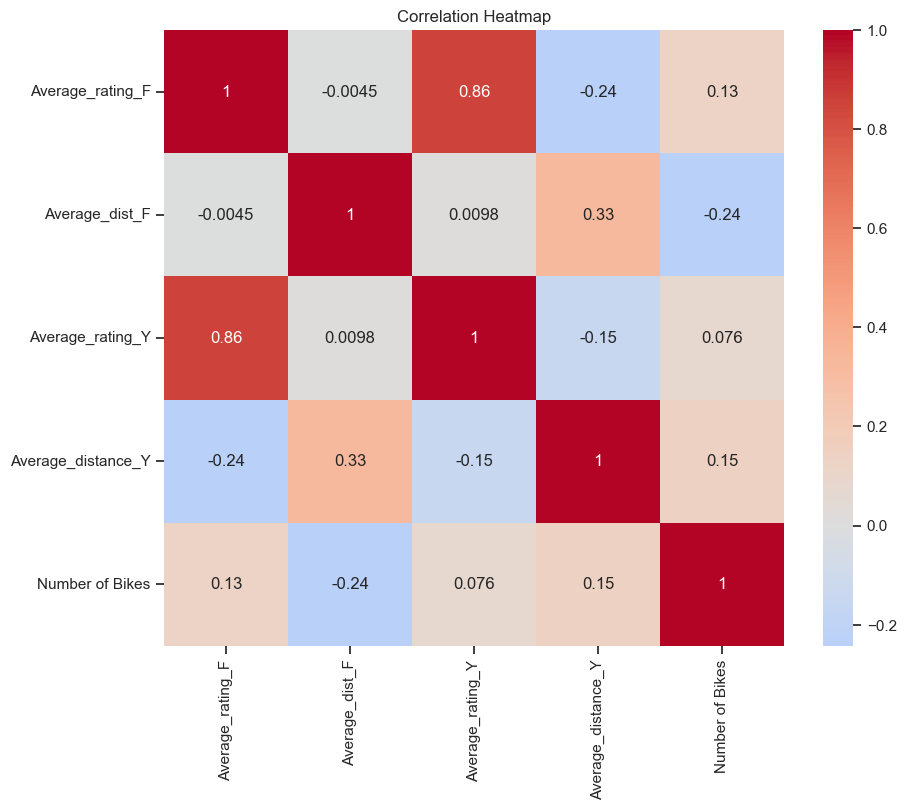

In [104]:
plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# y = df_features['Number of Bikes']
# X = df_features[['Average_review_count_Y', 'Average_distance_Y',
#             'Average_rating_F', 'Average_popularity_F']]
# X = sm.add_constant(X)  # adds a column of 1's for the intercept
# X.head()

In [94]:
# import statsmodels.api as sm

# y = df_features['Number of Bikes']
# X = df_features[['Average_rating_Y', 'Average_distance_Y',
#                     'Average_rating_F', 'Min_rating_F', 'Average_dist_F']]
# X = sm.add_constant(X)  # adds a column of 1's for the intercept
# X.head()

,const,Average_rating_Y,Average_distance_Y,Average_rating_F,Min_rating_F,Average_dist_F
0,1.0,4.725,813.634974,9.09,8.9,618.5
1,1.0,4.675,852.302705,8.90,8.7,824.0
2,1.0,4.725,834.061440,8.98,8.7,999.3
3,1.0,4.750,777.232101,9.13,9.0,584.4
4,1.0,4.775,689.425498,9.22,9.1,709.7


In [113]:
import statsmodels.api as sm

y = df_features['Number of Bikes']
X = df_features[['Average_distance_Y', 'Average_rating_F', 'Average_dist_F']]
X = sm.add_constant(X)  # adds a column of 1's for the intercept
X.head()

,const,Average_distance_Y,Average_rating_F,Average_dist_F
0,1.0,813.634974,9.09,618.5
1,1.0,852.302705,8.90,824.0
2,1.0,834.061440,8.98,999.3
3,1.0,777.232101,9.13,584.4
4,1.0,689.425498,9.22,709.7


In [114]:
model = sm.OLS(y, X) #instantiate
results = model.fit() #fit the model (this is where OLS is actually being run)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Number of Bikes   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     6.656
Date:                Sun, 27 Aug 2023   Prob (F-statistic):           0.000358
Time:                        22:05:31   Log-Likelihood:                -422.25
No. Observations:                 114   AIC:                             852.5
Df Residuals:                     110   BIC:                             863.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -74.2776     40

In [98]:
import statsmodels.api as sm

y = df_features['Number of Bikes']
X = df_features['Average_dist_F']
X = sm.add_constant(X)  # adds a column of 1's for the intercept
X.head()

,const,Average_dist_F
0,1.0,618.5
1,1.0,824.0
2,1.0,999.3
3,1.0,584.4
4,1.0,709.7


In [99]:
model = sm.OLS(y, X) #instantiate
results = model.fit() #fit the model (this is where OLS is actually being run)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Number of Bikes   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     6.939
Date:                Sun, 27 Aug 2023   Prob (F-statistic):            0.00963
Time:                        21:09:53   Log-Likelihood:                -428.33
No. Observations:                 114   AIC:                             860.7
Df Residuals:                     112   BIC:                             866.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             29.6985      6.615      4.